In [1]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive')

# Personalized path to your project directory
path = '/content/drive/MyDrive/cod/LEA3_helath' # Replace with your actual path

# Add the path to sys.path
sys.path.append(path)
os.chdir(path)

os.curdir



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'.'

In [2]:
####instalar paquetes
!pip install --quiet optuna

In [3]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
from sklearn.metrics import roc_auc_score
import pandas as pd


from tensorflow.keras.callbacks import ModelCheckpoint ## guardar mejor modelo



import optuna






In [4]:
### cargar bases_procesadas ####
x_train = joblib.load('salidas/x_train.pkl')
y_train = joblib.load('salidas/y_train.pkl')
x_test = joblib.load('salidas/x_test.pkl')
y_test = joblib.load('salidas/y_test.pkl')

In [5]:
############################################################
################ Preprocesamiento ##############
############################################################

#### Escalar ######################
x_train=x_train.astype('float32') ## para poder escalarlo
x_test=x_test.astype('float32') ## para poder escalarlo
x_train.max()
x_train.min()


x_train /=255 ### escalarlo para que quede entre 0 y 1, con base en el valor máximo
x_test /=255

###### verificar tamaños

x_train.shape
x_test.shape

np.prod(x_train[1].shape) ## cantidad de variables por imagen

np.unique(y_train, return_counts=True)
np.unique(y_test, return_counts=True)


(array([0, 1]), array([234, 390]))

In [ ]:
##########################################################
################ Redes convolucionales ###################
##########################################################

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss and Adam optimizer
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

## checkpoint

checkpoint = ModelCheckpoint(
    filepath='salidas/best_cnn_auc.keras',
    monitor='val_AUC',        # Metric must match name used in model.compile()
    mode='max',               # Use 'max' because higher AUC is better
    save_best_only=True,
    verbose=1
)



#Entrenar modelo para 10 epochs
cnn_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test), callbacks=checkpoint)


cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - AUC: 0.6383 - loss: 0.6254
Epoch 1: val_AUC improved from -inf to 0.93034, saving model to salidas/best_cnn_auc.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 997ms/step - AUC: 0.6413 - loss: 0.6223 - val_AUC: 0.9303 - val_loss: 0.3951
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - AUC: 0.9807 - loss: 0.1622
Epoch 2: val_AUC did not improve from 0.93034
53/53 ━━━━━━━━━━━━━━━━━━━━ 79s 967ms/step - AUC: 0.9808 - loss: 0.1617 - val_AUC: 0.9225 - val_loss: 0.6880
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - AUC: 0.9907 - loss: 0.1119
Epoch 3: val_AUC did not improve from 0.93034
53/53 ━━━━━━━━━━━━━━━━━━━━ 82s 958ms/step - AUC: 0.9907 - loss: 0.1118 - val_AUC: 0.9038 - val_loss: 0.8282
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.9945 - loss: 0.0845
Epoch 4: val_AUC did not improve from 0.93034
53/53 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - AUC: 0.9945 - loss: 0.0844 - val_AUC: 0.9210 - val_loss: 0.6991
Epoch 5/10
53/53 ━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265,829 (12.46 MB)

 Trainable params: 1,088,609 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,177,220 (8.31 MB)

In [ ]:
#######probar una red con regulzarización L2
reg_strength = 0.001

###########Estrategias a usar: regilarization usar una a la vez para ver impacto
dropout_rate = 0.1


cnn_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss and Adam optimizer
cnn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC',"accuracy"])

checkpoint2 = ModelCheckpoint(
    filepath='salidas/best_cnn2_auc.keras',
    monitor='val_AUC',        # Metric must match name used in model.compile()
    mode='max',               # Use 'max' because higher AUC is better
    save_best_only=True,
    verbose=1
)


# Train the model for 10 epochs
cnn_model2.fit(x_train, y_train, batch_size=100, epochs=3, validation_data=(x_test, y_test), callbacks=checkpoint2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - AUC: 0.5679 - accuracy: 0.7328 - loss: 0.7874
Epoch 1: val_AUC improved from -inf to 0.89965, saving model to salidas/best_cnn2_auc.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 833ms/step - AUC: 0.5703 - accuracy: 0.7333 - loss: 0.7847 - val_AUC: 0.8997 - val_accuracy: 0.7708 - val_loss: 0.5262
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - AUC: 0.9561 - accuracy: 0.9105 - loss: 0.3187
Epoch 2: val_AUC improved from 0.89965 to 0.93632, saving model to salidas/best_cnn2_auc.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 79s 781ms/step - AUC: 0.9564 - accuracy: 0.9108 - loss: 0.3179 - val_AUC: 0.9363 - val_accuracy: 0.7644 - val_loss: 0.6301
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - AUC: 0.9870 - accuracy: 0.9532 - loss: 0.2055
Epoch 3: val_AUC did not improve from 0.93632
53/53 ━━━━━━━━━━━━━━━━━━━━ 80s 749ms/step - AUC: 0.9870 - accuracy: 0.9532 - loss: 0.2054 - val_AUC: 0.9337 - val_accuracy: 0.7676 - val_loss: 0.6712


In [ ]:
# Función objetivo para utilizar optuna
def objective(trial):
    # grilla de huiperparámetros
    dropout_rate = trial.suggest_float('dropout_rate', 0.05, 0.2, step=0.05)
    reg_strength = trial.suggest_float('reg_strength', 0.0001, 0.0005, step=0.0001)
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd'])

    # Build the model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    checkpoint3 = ModelCheckpoint(
    filepath='salidas/best_cnn_optuna.keras',
    monitor='val_AUC',        # Metric must match name used in model.compile()
    mode='max',               # Use 'max' because higher AUC is better
    save_best_only=True,
    verbose=1)



    # Choose optimizer
    if optimizer_name == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=0.001)

    # Compile with AUC metric
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC(name='auc')])

    # Train the model
    model.fit(
        x_train, y_train,
        epochs=3,
        validation_data=(x_test, y_test),
        batch_size=100,
        verbose=0,
        callbacks=checkpoint3
    )

    model_win=tf.keras.models.load_model('salidas/best_cnn_optuna.keras')

    # Predict probabilities and compute AUC manually
    y_pred_prob = model_win.predict(x_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)

    # Save best model in trial attributes
    trial.set_user_attr("model", model_win)

    return auc

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Get best model
best_trial = study.best_trial
best_model = best_trial.user_attrs["model"]

# Final evaluation
test_loss, test_auc = best_model.evaluate(x_test, y_test)
print(f"\Mejor AUC on test set: {test_auc:.4f}")
best_model.summary()


[I 2025-05-26 19:03:43,583] A new study created in memory with name: no-name-018b3315-e6f1-4b88-904a-86f560ab37cf
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2025-05-26 19:07:58,699] Trial 0 finished with value: 0.9386259040105194 and parameters: {'dropout_rate': 0.05, 'reg_strength': 0.0002, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9386259040105194.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2025-05-26 19:12:11,132] Trial 1 finished with value: 0.9123274161735699 and parameters: {'dropout_rate': 0.2, 'reg_strength': 0.00030000000000000003, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9386259040105194.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step


[I 2025-05-26 19:15:46,658] Trial 2 finished with value: 0.94494301994302 and parameters: {'dropout_rate': 0.2, 'reg_strength': 0.00030000000000000003, 'optimizer': 'adam'}. Best is trial 2 with value: 0.94494301994302.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


[I 2025-05-26 19:18:48,139] Trial 3 finished with value: 0.9140806486960332 and parameters: {'dropout_rate': 0.1, 'reg_strength': 0.0005, 'optimizer': 'adam'}. Best is trial 2 with value: 0.94494301994302.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


[I 2025-05-26 19:22:23,736] Trial 4 finished with value: 0.9333442910365988 and parameters: {'dropout_rate': 0.2, 'reg_strength': 0.0001, 'optimizer': 'adam'}. Best is trial 2 with value: 0.94494301994302.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2025-05-26 19:26:35,538] Trial 5 finished with value: 0.9374534297611221 and parameters: {'dropout_rate': 0.05, 'reg_strength': 0.00030000000000000003, 'optimizer': 'adam'}. Best is trial 2 with value: 0.94494301994302.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


[I 2025-05-26 19:30:49,047] Trial 6 finished with value: 0.945069033530572 and parameters: {'dropout_rate': 0.1, 'reg_strength': 0.0004, 'optimizer': 'adam'}. Best is trial 6 with value: 0.945069033530572.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


[I 2025-05-26 19:35:01,271] Trial 7 finished with value: 0.9291584483892176 and parameters: {'dropout_rate': 0.1, 'reg_strength': 0.0002, 'optimizer': 'adam'}. Best is trial 6 with value: 0.945069033530572.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


[I 2025-05-26 19:37:54,521] Trial 8 finished with value: 0.7288187595879905 and parameters: {'dropout_rate': 0.2, 'reg_strength': 0.0002, 'optimizer': 'sgd'}. Best is trial 6 with value: 0.945069033530572.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2025-05-26 19:40:46,572] Trial 9 finished with value: 0.6102344948498795 and parameters: {'dropout_rate': 0.2, 'reg_strength': 0.0005, 'optimizer': 'sgd'}. Best is trial 6 with value: 0.945069033530572.


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - auc: 0.6318 - loss: 0.7254
\Mejor AUC on test set: 0.9428


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265,829 (12.46 MB)

 Trainable params: 1,088,609 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,177,220 (8.31 MB)

In [ ]:
best_model.save('salidas/best_cnn_optuna.keras')

In [ ]:
#### Análisis del modelo ganador ################

In [6]:
### cargar modelo

modelo_ganador=tf.keras.models.load_model('salidas/best_cnn_optuna.keras')
test_loss, test_auc = modelo_ganador.evaluate(x_test, y_test)
print(f"\Mejor AUC on test set: {test_auc:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - auc: 0.6318 - loss: 0.7254
\Mejor AUC on test set: 0.9428


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


Text(0.5, 1.0, 'probabilidades imágenes en entrenamiento')

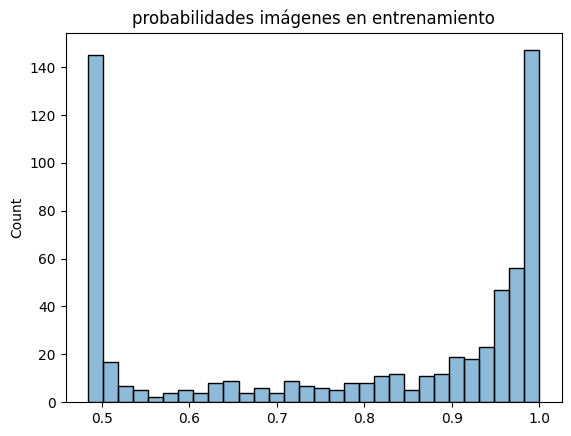

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

####probabilidades en evaluación para grupo 1 (tienen neumonía) #######
prob=modelo_ganador.predict(x_test)
sns.histplot(prob, legend=False, bins=30)
plt.title("probabilidades imágenes en entrenamiento")### conocer el comportamiento de las probabilidades para revisar threshold


163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step


Text(0.5, 1.0, 'probabilidades imágenes en entrenamiento')

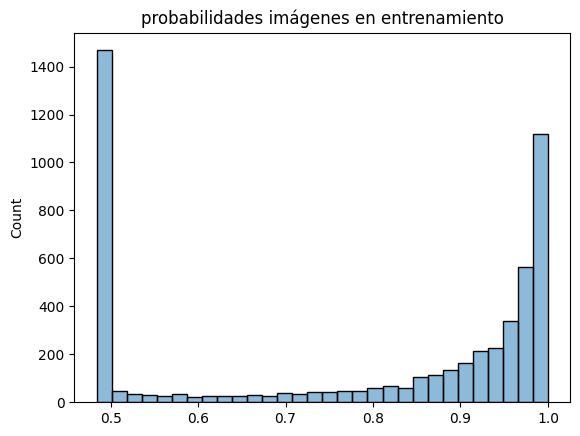

In [8]:
### probabilidades en entrenamiento #####
prob=modelo_ganador.predict(x_train)
sns.histplot(prob, legend=False, bins=30)
plt.title("probabilidades imágenes en entrenamiento")### conocer el comportamiento de las probabilidades para revisar threshold


In [10]:
threshold_neu=0.95

pred_train=(modelo_ganador.predict(x_train)>=threshold_neu).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'Normal'])
disp.plot()

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step
              precision    recall  f1-score   support

           0       0.60      0.97      0.74       234
           1       0.98      0.61      0.75       390

    accuracy                           0.75       624
   macro avg       0.79      0.79      0.75       624
weighted avg       0.83      0.75      0.75       624



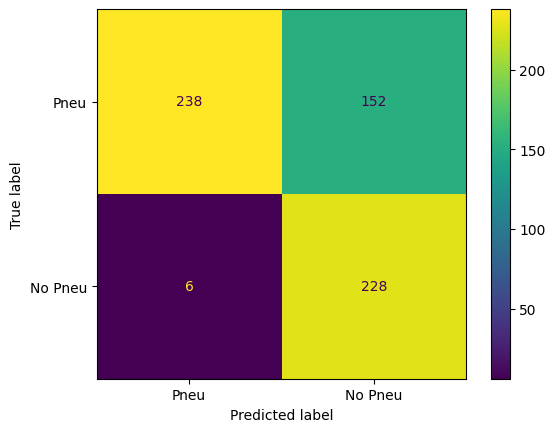

In [13]:


pred_test=(modelo_ganador.predict(x_test)>=threshold_neu).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'No Pneu'])
disp.plot()



20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
              precision    recall  f1-score   support

           0       0.21      0.42      0.28       234
           1       0.06      0.02      0.03       390

    accuracy                           0.17       624
   macro avg       0.13      0.22      0.16       624
weighted avg       0.12      0.17      0.13       624



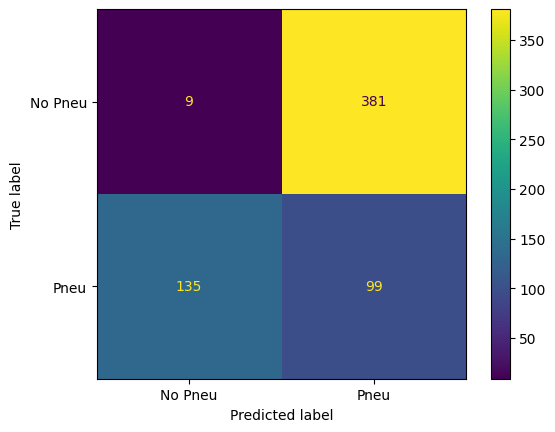

In [16]:
threshold_no_neu=0.5

pred_train=(modelo_ganador.predict(x_train)<=threshold_no_neu).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['No Pneu', 'Pneu'])
disp.plot()

pred_test=(modelo_ganador.predict(x_test)<=threshold_no_neu).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['No Pneu', 'Pneu'])
disp.plot()






In [ ]:
prob=modelo_ganador.predict(x_test)

clas=['Neu' if prob >threshold_neu else "No ident" for prob in prob]

clases, count =np.unique(clas, return_counts=True)

count*100/np.sum(count)

100000*100

array([39.1025641, 60.8974359])